# Diamonds Data Exploration

## Preliminary Wrangling

This document explores a dataset containing 183412 rows and 16 columns.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
ford = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
ford.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
pd.set_option('display.max_columns', 50)

In [5]:
print(ford.shape)
ford.info()

(183412, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [6]:
ford.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


## What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> This dataset contains 183412 rows of data and 16 columns(duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip)

## What is/are the main feature(s) of interest in your dataset?
> I will be looking to figure out how different users use the bikes through out the week

## What features in the dataset do you think will help support your investigation into your feature(s) of interest?
> The features the i believe will help me are; duration_sec, user_type, and the start_time.


In [7]:
ford['start_station_name'].nunique()

329

In [8]:
ford.duplicated().sum()

0

In [9]:
ford.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

## Quality issues

- Start_time and end_time columns are in object datatype
- user_type column is in object datatype
- member_gender is in object datatype
- missing values in some columns

## Tidiness issues
- start Day should have a column
- age column should a column

## DATA CLEANING

Programmatic cleaning
- Define
- code
- Test

In [10]:
# but first we need to make a copy of the original data

ford_clean = ford.copy()

In [11]:
# Define: Change column datatypes according to their values

#Code: 
dtype= {'start_time': 'datetime64', 
        'end_time': 'datetime64',
        'user_type': 'category',
       'member_gender':'category'}

ford_clean = ford_clean.astype(dtype)

#Test
ford_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null category
member_birth_year          175147 non-null float64
member_gender              175147 non-null category
bike_share_for_all_trip    183412 non-null object
dtypes: category(2), datetime64[ns](2), float64(7), int64(2), ob

In [12]:
# Define: Drop missing values

# code:
ford_clean.dropna(axis = 0, inplace = True)

In [13]:
#Test
ford_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null category
member_birth_year          174952 non-null float64
member_gender              174952 non-null category
bike_share_for_all_trip    174952 non-null object
dtypes: category(2), datetime64[ns](2), float64(7), int64(2), ob

In [14]:
#define: extract start_day, start_month from start_time

#code;
ford_clean['start_month'] = ford_clean['start_time'].dt.month_name()
ford_clean['start_day'] = ford_clean['start_time'].dt.day_name()
ford_clean['end_month'] = ford_clean['end_time'].dt.month_name()
ford_clean['end_start_day'] = ford_clean['end_time'].dt.day_name()
ford_clean['hour'] = ford_clean['start_time'].dt.hour

In [15]:
#define: create column for member age

#code
ford_clean['member_age'] = (2019 - (ford_clean.member_birth_year))

# Univariate Exploration

## Question
> How many user types are there, and what are their percentages?

In [16]:
ford_clean['user_type'].unique()

[Customer, Subscriber]
Categories (2, object): [Customer, Subscriber]

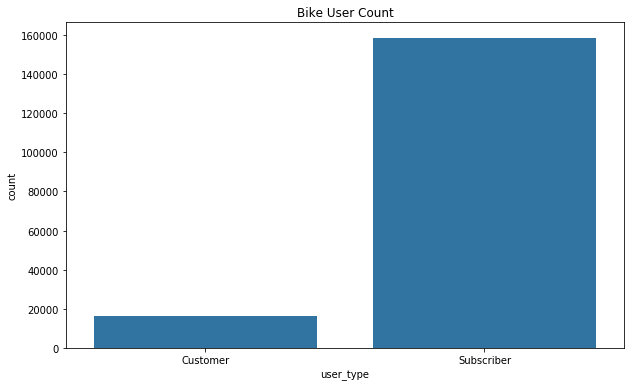

In [17]:
plt.figure(figsize=(10,6))     
base_color = sb.color_palette()[0]
ax = sb.countplot(data=ford_clean, x ='user_type', color=base_color)

plt.title('Bike User Count');

This shows the numbers of different user-types and how they differ

> What is the percentage of two catgegories of user type

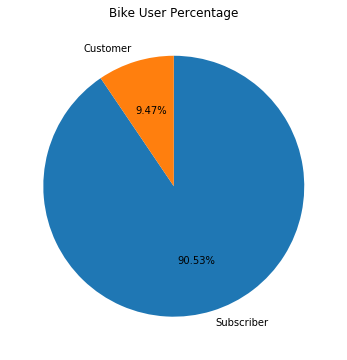

In [18]:
plt.figure(figsize=(10,6)) 
labels = ford_clean['user_type'].value_counts().index
plt.pie(data = ford_clean, x = ford_clean['user_type'].value_counts(), labels = labels, startangle = 90,
        counterclock = False, autopct='%1.2f%%');

plt.title('Bike User Percentage');

There are two categories of users, subscriber and customers, with subscriber making 90.53% of total users.

> What is the percentage of each category of member's gender

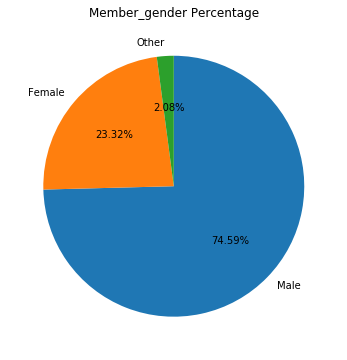

In [19]:
plt.figure(figsize=(10,6)) 
labels = ford_clean['member_gender'].value_counts().index
plt.pie(data = ford_clean, x = ford_clean['member_gender'].value_counts(), labels = labels, startangle = 90,
        counterclock = False, autopct='%1.2f%%');

plt.title('Member_gender Percentage');

There are more males than any other categories of member's gender

## Distribution of duration

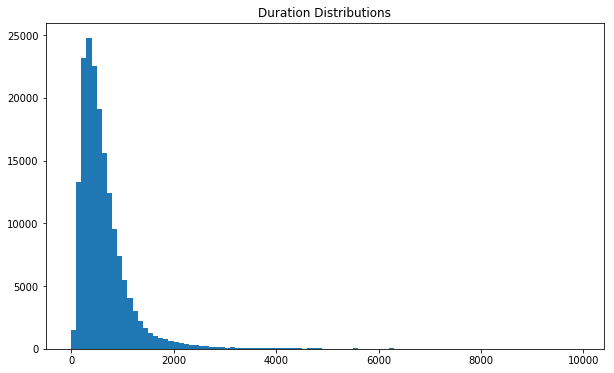

In [20]:
plt.figure(figsize=(10,6))
bins = np.arange(0, 10000, 100)

plt.hist(ford_clean.duration_sec, bins=bins)
plt.title('Duration Distributions');

The distribution is skewed to the right

## What days of the week were bike rented the most

In [21]:
ford_clean.start_day.value_counts()

Thursday     33712
Tuesday      30584
Wednesday    28426
Friday       27663
Monday       25641
Sunday       14512
Saturday     14414
Name: start_day, dtype: int64

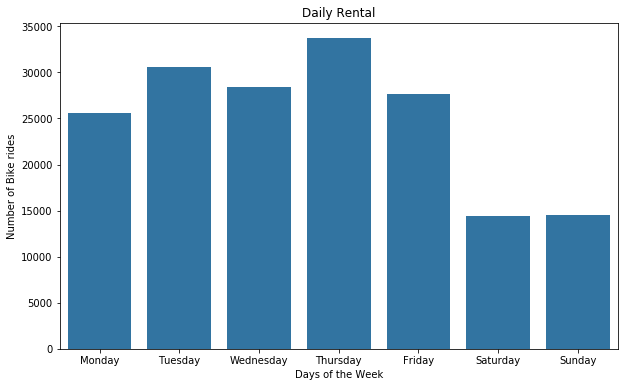

In [22]:
plt.figure(figsize=(10,6))
day_name = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

sb.countplot(data = ford_clean, x = 'start_day', order=day_name, color=base_color);
plt.xlabel('Days of the Week')
plt.ylabel('Number of Bike rides')
plt.title('Daily Rental');

Bikes are rented mainly on the weekdays, weekends shows low rentage.

## What hour of the day are bikes rented the most?

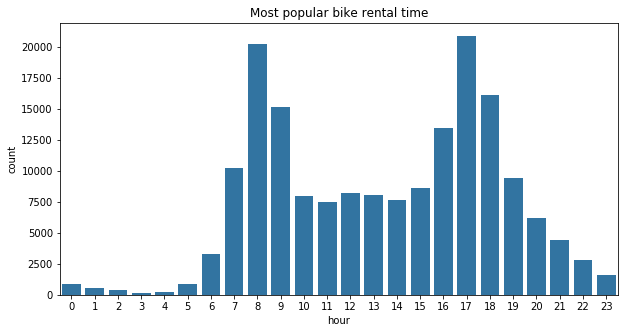

In [24]:
plt.figure(figsize=(10,5))
sb.countplot(data = ford_clean, x = 'hour', color=base_color);
plt.title('Most popular bike rental time');

Bikes are rented more at hour 8 and hour 17, which are the hours that people tend to go to work and also close from work respectively

## Which start_station were used the most

In [25]:
ford_clean.start_station_name.value_counts()

Market St at 10th St                                               3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)          3408
Berry St at 4th St                                                 2952
Montgomery St BART Station (Market St at 2nd St)                   2711
Powell St BART Station (Market St at 4th St)                       2620
San Francisco Caltrain (Townsend St at 4th St)                     2577
San Francisco Ferry Building (Harry Bridges Plaza)                 2541
Howard St at Beale St                                              2216
Steuart St at Market St                                            2191
Powell St BART Station (Market St at 5th St)                       2144
The Embarcadero at Sansome St                                      1975
Bancroft Way at Telegraph Ave                                      1761
Bancroft Way at College Ave                                        1712
2nd St at Townsend St                                           

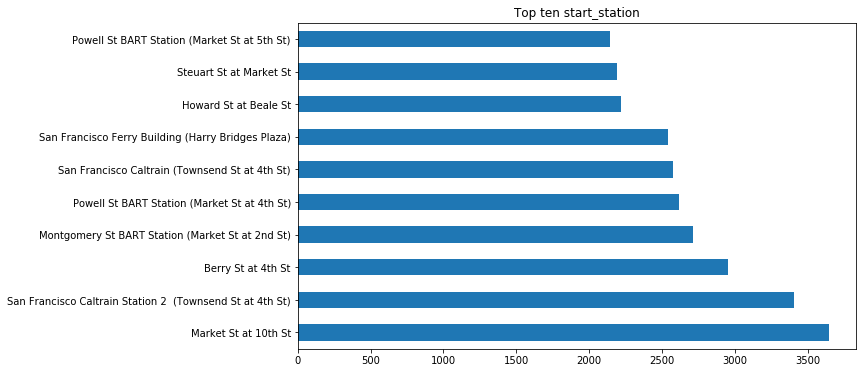

In [26]:
plt.figure(figsize=(10,6))
ford_clean.start_station_name.value_counts().head(10).plot.barh();

plt.title('Top ten start_station');

This are the top 10 most used start stations, with Market St at 10th St being the most used

## Which start_station were used the least

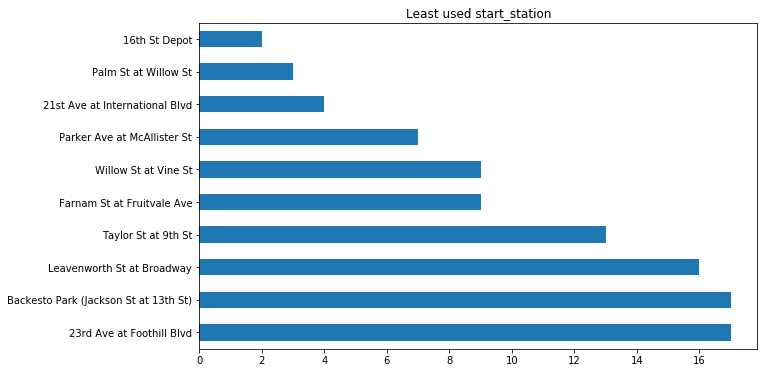

In [27]:
plt.figure(figsize=(10,6))
ford_clean.start_station_name.value_counts().tail(10).plot.barh();

plt.title('Least used start_station');

This are the top 10 least used start stations, with 16th St Depot being the least used

## Which end_station were used the most

In [28]:
ford_clean.end_station_name.value_counts()

San Francisco Caltrain Station 2  (Townsend St at 4th St)          4624
Market St at 10th St                                               3709
Montgomery St BART Station (Market St at 2nd St)                   3461
San Francisco Ferry Building (Harry Bridges Plaza)                 3151
San Francisco Caltrain (Townsend St at 4th St)                     2870
Powell St BART Station (Market St at 4th St)                       2854
Berry St at 4th St                                                 2782
The Embarcadero at Sansome St                                      2341
Steuart St at Market St                                            2264
Powell St BART Station (Market St at 5th St)                       2153
Howard St at Beale St                                              1970
Bancroft Way at Telegraph Ave                                      1780
Beale St at Harrison St                                            1780
Civic Center/UN Plaza BART Station (Market St at McAllister St) 

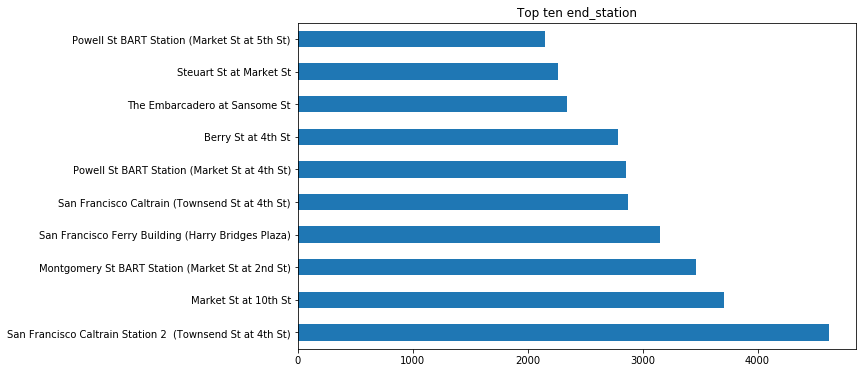

In [29]:
plt.figure(figsize=(10,6))
ford_clean.end_station_name.value_counts().head(10).plot.barh();

plt.title('Top ten end_station');

This are the top 10 most used end stations, with San Francisco Caltrain Station 2  (Townsend St at 4th St)   being the most used

## Which end_station were used the least

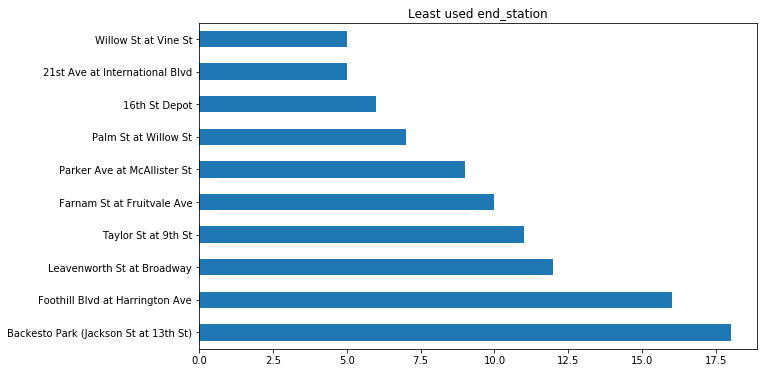

In [30]:
plt.figure(figsize=(10,6))
ford_clean.end_station_name.value_counts().tail(10).plot.barh();

plt.title('Least used end_station');

This are the top 10 least used end stations, with Willow St at Vine St being the most used

## What is the average member age

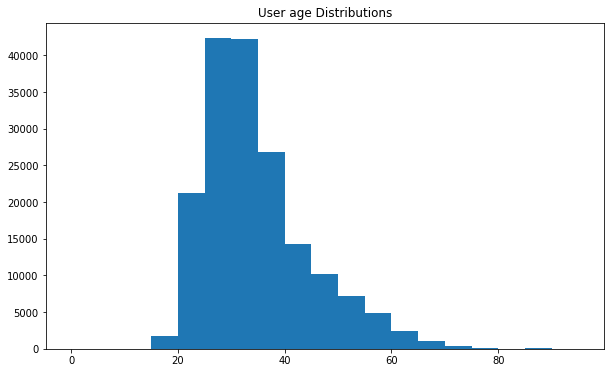

In [31]:
plt.figure(figsize=(10,6))
bins = np.arange(0, 100, 5)

plt.hist(ford_clean.member_age, bins = bins)
plt.title('User age Distributions');

This shows the average age of users

In [32]:
ford_clean.member_age.mean()

34.196865425945404

## Bivariate Exploration

### Question
> On which days of the week are bikes rented the most, per user_type?

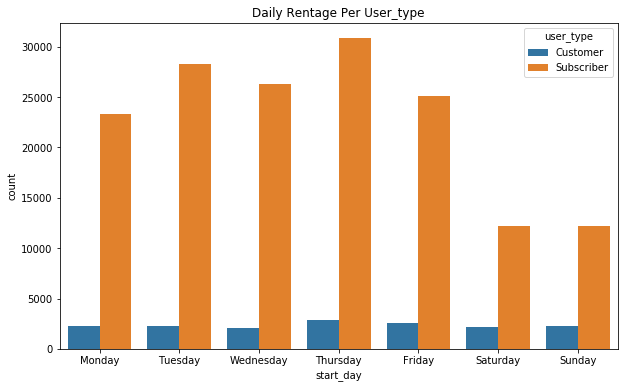

In [33]:
plt.figure(figsize=(10,6))
day_name = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
sb.countplot(data = ford_clean, x = 'start_day',hue = 'user_type', order=day_name);
plt.title('Daily Rentage Per User_type');

Number of bikes rented per day by the Subscribed users is significantly higher than that of the regular customer all week


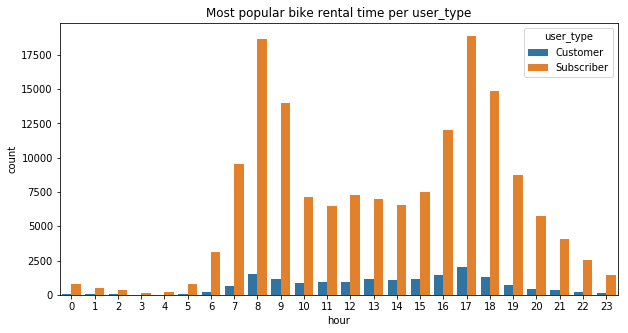

In [34]:
plt.figure(figsize=(10,5))
sb.countplot(data = ford_clean, x = 'hour', hue = 'user_type');
plt.title('Most popular bike rental time per user_type');

Bikes are used more during the 8th and 17th hour of the day by both categories of user_type, those are the peak hours.

C:\Users\OLUWASAMSON\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\OLUWASAMSON\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 720x720 with 0 Axes>

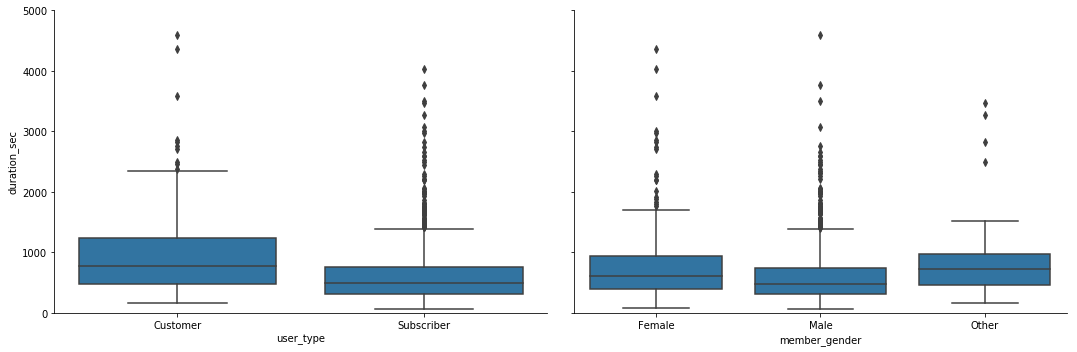

In [35]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

samples = np.random.choice(ford_clean.shape[0], 2000, replace = False)
ride_samp = ford_clean.loc[samples,:];

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color);

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = ride_samp, y_vars = 'duration_sec', x_vars = ['user_type', 'member_gender',],
                size = 5, aspect = 1.5);
g.map(boxgrid);
plt.ylim([0,5000]);
plt.show();

The Customer usertype travels more distance and the subscribers, also the Female gender travels more duration than the male

## What is the average duration in seconds per days of the week

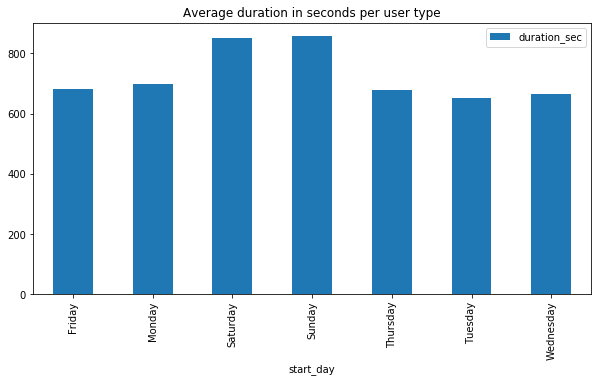

In [36]:
ford_clean[['start_day', 'duration_sec']].groupby('start_day').mean().plot.bar(figsize=(10,5));
plt.title('Average duration in seconds per user type');

The duration ride is higher on the weekends

## What is the average duration in seconds per user type

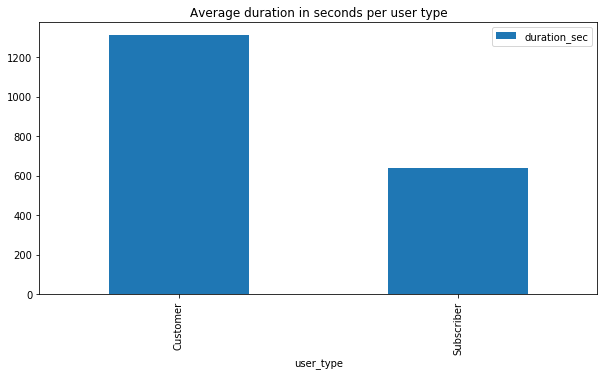

In [37]:
ford_clean[['user_type', 'duration_sec']].groupby('user_type').mean().plot.bar(figsize=(10,5));
plt.title('Average duration in seconds per user type');

Despite the Customer user_type having little number, they have a higher average duration_sec than the subscribers

## Multivariate Exploration

> Duration vs Start day vs User type

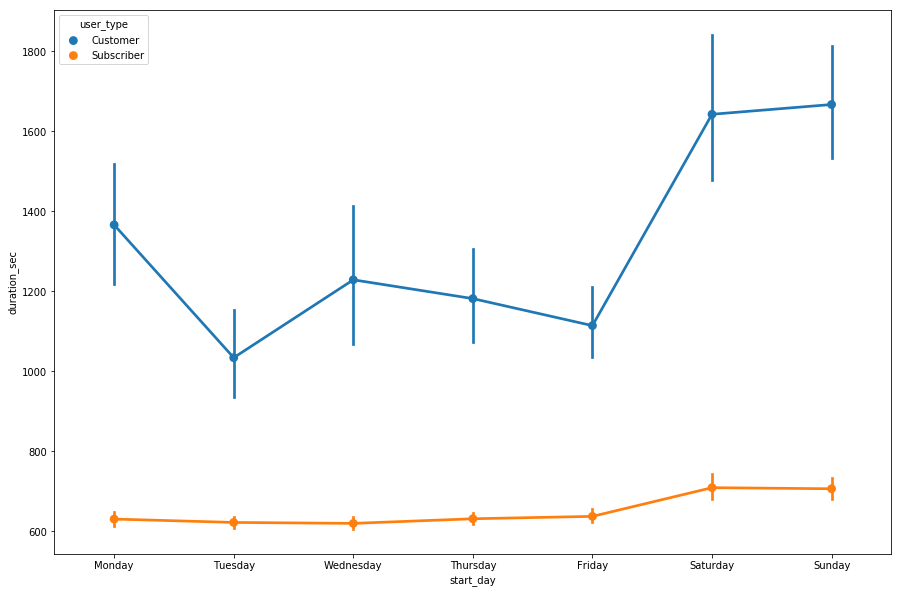

In [38]:
plt.figure(figsize=(15,10))
day_name = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
sb.pointplot(data = ford_clean, x ='start_day', y = 'duration_sec', hue = 'user_type', order = day_name);

Even though there are more Subscribers than Customers and despite the fact that there are more rides on weekdays, The duration of rides in the weekend is significantly higer than the weekdays and Customers tend to travel more distance than the subscribers.

## Conclusion
- The dataset is just for the month of February 2019

- The average duration for all trips is just little of 700 seconds

- Most trips were taken on Thursdays and Tuesdays

- Weekends have the least trip records, but has the longest durations

- Bike ride have high records at hour 8 and hour 17, which are the hours that people tend to go to work and also close from work respectively¶

- About 90% of the trips were taken by subscribers

- Less than 10% of the trips were bike sharing for all trips

- Males take trips more than any gender category

- Customers spend more duration than subscribers

- Females spend more duration than males

- Customers travel for longer durations regardless of the day of the week as compared to subscribers.